In [0]:
#import library and load given feature and labels
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils
import numpy as np


In [3]:
#import traiing and testing data from google drive

from google.colab import drive
drive.mount('/content/gdrive')

X_train = np.load('/content/gdrive/My Drive/datasets/training_data.npy')
Y_train = np.load('/content/gdrive/My Drive/datasets/training_label.npy')
X_test = np.load('/content/gdrive/My Drive/datasets/testing_data.npy')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#preprocess steps

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(np.max(X_train))
print(np.min(X_train))


(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
1.0
0.0


In [5]:
rows, cols = 28,28

# data preprocessing

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print(X_train.shape[0], 'training samples')
print(X_test.shape[0], 'test samples')

input_shape = (28,28,1)
num_classes = 10 # number of classess for classification 

print("Trining Label in before one hot encoding")
print (Y_train.shape)
print (Y_train[0])

#Convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)

print("Trining Label in after one hot encoding")
print (Y_train.shape)
print (Y_train[0])


X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
60000 training samples
10000 test samples
Trining Label in before one hot encoding
(60000,)
9
Trining Label in after one hot encoding
(60000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
#CNN arch

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [0]:
#Compile model with optimiser Adadelt

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])


In [11]:
batch_size = 256
epochs = 15

# taining the network

history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 7s 140us/step - loss: 0.6945 - acc: 0.7570 - val_loss: 0.3995 - val_acc: 0.8521
Epoch 2/15
48000/48000 [==============================] - 6s 123us/step - loss: 0.4146 - acc: 0.8527 - val_loss: 0.3351 - val_acc: 0.8773
Epoch 3/15
48000/48000 [==============================] - 6s 122us/step - loss: 0.3615 - acc: 0.8718 - val_loss: 0.3440 - val_acc: 0.8798
Epoch 4/15
48000/48000 [==============================] - 6s 122us/step - loss: 0.3280 - acc: 0.8824 - val_loss: 0.2903 - val_acc: 0.8942
Epoch 5/15
48000/48000 [==============================] - 6s 122us/step - loss: 0.3067 - acc: 0.8900 - val_loss: 0.2963 - val_acc: 0.8923
Epoch 6/15
48000/48000 [==============================] - 6s 122us/step - loss: 0.2882 - acc: 0.8969 - val_loss: 0.2609 - val_acc: 0.9020
Epoch 7/15
48000/48000 [==============================] - 6s 122us/step - loss: 0.2704 - acc: 0.9029 - val_loss: 0.2520 - 

In [12]:
#printing metrices
print (model.metrics_names)

['loss', 'acc']


In [13]:
# print model summary
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


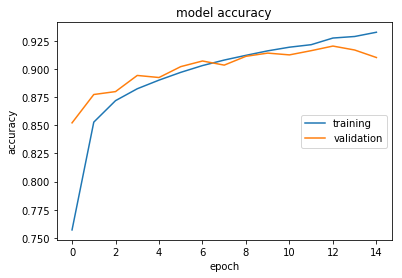

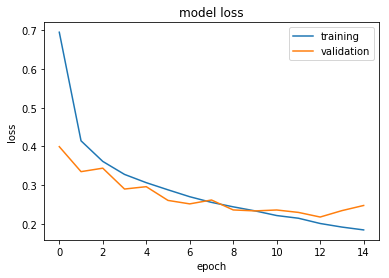

In [14]:
# to visualize the performance with plots...plot loss and accuracy in training and validation 
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='center right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [0]:
#predict ,conver to numeric and save the ouput
pred=model.predict(X_test)
numeric_class=np.argmax(pred,axis=1)
np.save('/content/gdrive/My Drive/docs/labels_1_2_AI0101.npy',numeric_class)

In [0]:
#save model
model.save('/content/gdrive/My Drive/docs/assg_2_model_AI0101.h5')